In [33]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
!pip install pandas openpyxl matplotlib seaborn

In [29]:
file_path = "../data/BIXI_Data_2023.xlsx"
df = pd.read_excel(file_path, sheet_name=0)

In [36]:
# Preview the dataset
df.head()

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS
0,MÃ©tro Mont-Royal (UtilitÃ©s publiques / Rivard),Le Plateau-Mont-Royal,45.524236,-73.581552,Chabot / Mont-Royal,Le Plateau-Mont-Royal,45.534134,-73.573524,1698266696468,1.698267e+12
1,Rielle / Wellington,Verdun,45.460156,-73.567001,St-Jacques / McGill,Ville-Marie,45.501441,-73.560144,1698270535502,1.698272e+12
2,Ste-Catherine / Drummond,Ville-Marie,45.498588,-73.574278,Peel / Ottawa,Le Sud-Ouest,45.494200,-73.559985,1698285705974,1.698286e+12
3,Boyer / du Mont-Royal,Le Plateau-Mont-Royal,45.527432,-73.579917,de l'HÃ´tel-de-Ville / Rachel,Le Plateau-Mont-Royal,45.519897,-73.580106,1698269489932,1.698270e+12
4,Clark / Ontario,Ville-Marie,45.510625,-73.566903,Wolfe / Robin,Ville-Marie,45.519581,-73.560116,1698270006571,1.698270e+12


In [37]:
# Overview of data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   STARTSTATIONNAME            1048100 non-null  object 
 1   STARTSTATIONARRONDISSEMENT  1048100 non-null  object 
 2   STARTSTATIONLATITUDE        1048100 non-null  float64
 3   STARTSTATIONLONGITUDE       1048100 non-null  float64
 4   ENDSTATIONNAME              1042340 non-null  object 
 5   ENDSTATIONARRONDISSEMENT    1042340 non-null  object 
 6   ENDSTATIONLATITUDE          1042340 non-null  float64
 7   ENDSTATIONLONGITUDE         1042340 non-null  float64
 8   STARTTIMEMS                 1048575 non-null  int64  
 9   ENDTIMEMS                   1043029 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 80.0+ MB


In [38]:
# Check for NaNs
df.isnull().sum()

STARTSTATIONNAME               475
STARTSTATIONARRONDISSEMENT     475
STARTSTATIONLATITUDE           475
STARTSTATIONLONGITUDE          475
ENDSTATIONNAME                6235
ENDSTATIONARRONDISSEMENT      6235
ENDSTATIONLATITUDE            6235
ENDSTATIONLONGITUDE           6235
STARTTIMEMS                      0
ENDTIMEMS                     5546
dtype: int64

In [39]:
# Basic stats
df.describe()

,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS
count,1.048100e+06,1.048100e+06,1.042340e+06,1.042340e+06,1.048575e+06,1.043029e+06
mean,4.534408e+01,-7.331028e+01,4.531747e+01,-7.326842e+01,1.691674e+12,1.691676e+12
std,2.842207e+00,4.434573e+00,3.045925e+00,4.752413e+00,5.095758e+09,5.095948e+09
min,-1.000000e+00,-7.375823e+01,-1.000000e+00,-7.375823e+01,1.681387e+12,1.681387e+12
25%,4.550398e+01,-7.359347e+01,4.550281e+01,-7.359214e+01,1.687558e+12,1.687559e+12
50%,4.552069e+01,-7.357718e+01,4.552012e+01,-7.357602e+01,1.691673e+12,1.691674e+12
75%,4.553342e+01,-7.356666e+01,4.553341e+01,-7.356395e+01,1.695430e+12,1.695432e+12
max,4.570235e+01,-1.000000e+00,4.570235e+01,-1.000000e+00,1.703925e+12,1.704026e+12


In [43]:
df['STARTSTATIONNAME'] = df['STARTSTATIONNAME'].str.encode('latin1', errors='ignore').str.decode('utf-8', errors='ignore')

In [44]:
df['ENDSTATIONNAME'] = df['ENDSTATIONNAME'].str.encode('latin1', errors='ignore').str.decode('utf-8', errors='ignore')

In [45]:
# Convert milliseconds to datetime
df['STARTTIME'] = pd.to_datetime(df['STARTTIMEMS'], unit='ms')
df['ENDTIME'] = pd.to_datetime(df['ENDTIMEMS'], unit='ms')

# Drop the raw timestamp columns if not needed
df.drop(columns=['STARTTIMEMS', 'ENDTIMEMS'], inplace=True)

In [46]:
df['TRIP_DURATION_MIN'] = (df['ENDTIME'] - df['STARTTIME']).dt.total_seconds() / 60

In [48]:
df = df[df['TRIP_DURATION_MIN'] > 1]
df = df[df['TRIP_DURATION_MIN'] < 120]

df.dropna(subset=[
    'STARTSTATIONLATITUDE', 'STARTSTATIONLONGITUDE',
    'ENDSTATIONLATITUDE', 'ENDSTATIONLONGITUDE'
], inplace=True)

df.drop_duplicates(inplace=True)

In [49]:
df.rename(columns={
    'STARTSTATIONNAME': 'start_station_name',
    'STARTSTATIONARRONDISSEMENT': 'start_arrondissement',
    'STARTSTATIONLATITUDE': 'start_lat',
    'STARTSTATIONLONGITUDE': 'start_lon',
    'ENDSTATIONNAME': 'end_station_name',
    'ENDSTATIONARRONDISSEMENT': 'end_arrondissement',
    'ENDSTATIONLATITUDE': 'end_lat',
    'ENDSTATIONLONGITUDE': 'end_lon',
    'STARTTIME': 'start_time',
    'ENDTIME': 'end_time',
    'TRIP_DURATION_MIN': 'trip_duration_min'
}, inplace=True)

In [50]:
# Save as CSV or Parquet
df.to_csv('../data/clean_bixi_2023.csv', index=False)

### Visualization

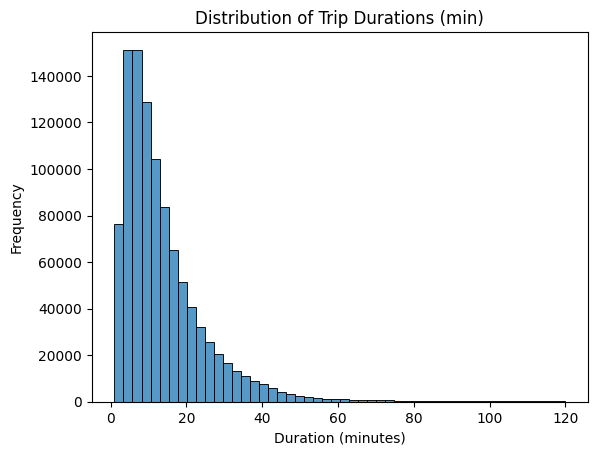

In [51]:
# Distribution of trip durations
sns.histplot(df['trip_duration_min'], bins=50)
plt.title('Distribution of Trip Durations (min)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()